In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

In [4]:
# Importing the important datasets
titanic = pd.read_csv('Dataset/titanic_complete.csv')
train_data = pd.read_csv('Dataset/train.csv')
test_data = pd.read_csv('Dataset/test.csv')

In [5]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     1309 non-null   int64  
 11  Ticket       1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [10]:
titanic.shape

(1309, 12)

In [11]:
titanic.nunique(axis = 0)

Age              98
Cabin           186
Embarked          3
Fare            281
Name           1307
Parch             8
PassengerId    1309
Pclass            3
Sex               2
SibSp             7
Survived          2
Ticket          929
dtype: int64

In [12]:
titanic.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1307,3,S,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Kelly, Mr. James",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0


In [13]:
titanic.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [23]:
# Null data-points in Train data set 
[train_data.isnull().sum(),
len(train_data)]

[PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 891]

In [24]:
# Null data-points in Test dataset
[test_data.isnull().sum(), len(test_data)]

[PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64,
 418]

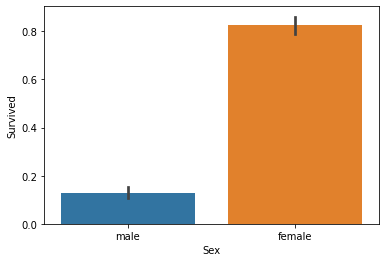

In [91]:
# Who had survived based on sex?
sbn.barplot(x = 'Sex', y = 'Survived' , data = titanic);

In [110]:
# What are the percentage of survival based on sex
male_par = titanic["Survived"][titanic["Sex"] == 'male'].value_counts(normalize = True)[1]*100
print('{:.0f}% of Males who survived'.format(male_par))

female_par = titanic["Survived"][titanic["Sex"] == 'female'].value_counts(normalize = True)[1]*100
print('{:.0f}% of Females who survived'.format(female_par))

13% of Males who survived
83% of Females who survived


male      0.644003
female    0.355997
Name: Sex, dtype: float64

### Treating the Missing Values from Train and Test Data Set
#### Missing data available in Age, Cabin, Embarked, Fare

### (1) Age

In [41]:
# how much missing data in age feature?
print('Missing entry for Age in entire titanic dataset are {} out of {}.'.format(titanic['Age'].isnull().sum(), len(titanic)))
print('Missing percentage {:.0f}%'.format(titanic['Age'].isnull().sum()/len(titanic)*100))

Missing entry for Age in entire titanic dataset are 263 out of 1309.
Missing percentage 20%


In [61]:
# Skewness in Age on entire dataset
print('Skewness in Age : {0:.2f}'.format(titanic.Age.skew()))

Skewness in Age : 0.41


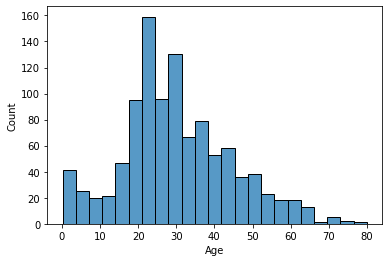

In [47]:
sbn.histplot(x = 'Age', data = titanic);

Series([], Name: Age, dtype: float64)